In [1]:
import pandas as pd

In [8]:
# load table
df = pd.read_csv("data/sbux.csv")

In [9]:
# show top of data, .tail() for bottom
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [10]:
# get information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [11]:
# some more information
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,48.344296,48.717212,47.956827,48.352246,9.230517e+06
std,10.389108,10.458485,10.304082,10.391867,4.382209e+06
min,26.535000,26.820000,26.260000,26.605000,2.215418e+06
25%,38.372500,38.690650,38.087750,38.355000,6.661026e+06
50%,53.520000,53.995000,53.180000,53.540000,8.138313e+06
75%,57.270000,57.735000,56.850000,57.360000,1.059388e+07
max,64.850000,64.870000,64.180000,64.570000,5.345479e+07


In [18]:
# select column
df["open"]

0       27.920
1       28.260
2       28.000
3       28.230
4       27.765
         ...  
1254    56.280
1255    55.900
1256    55.530
1257    53.685
1258    55.080
Name: open, Length: 1259, dtype: float64

In [14]:
# select many columns
df[["open", "close"]]

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775
...,...,...
1254,56.280,56.000
1255,55.900,55.770
1256,55.530,54.690
1257,53.685,55.610


In [16]:
# select row by index
df.iloc[0]

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
Name            SBUX
Name: 0, dtype: object

In [19]:
# filters
# DataFrame[series of boolean]
df[df["open"] > 64]

,date,open,high,low,close,volume,Name
1087,2017-06-05,64.85,64.870,64.18,64.27,6809284,SBUX
1088,2017-06-06,64.22,64.350,64.05,64.16,5448439,SBUX
1089,2017-06-07,64.13,64.295,63.34,63.50,8364994,SBUX


In [20]:
# to numpy
arr = df[["open", "close"]].values
arr

array([[27.92 , 28.185],
       [28.26 , 28.07 ],
       [28.   , 28.13 ],
       ...,
       [55.53 , 54.69 ],
       [53.685, 55.61 ],
       [55.08 , 54.46 ]])

In [21]:
# save data
small_df = df[["open", "close"]]
small_df.to_csv("data/output.csv")

In [22]:
# save data without index
small_df.to_csv("data/output.csv", index=False)

## Apply function

In [26]:
# function working with rows
date_to_year = lambda row: int(row["date"].split("-")[0])
# test it
date_to_year(df.iloc[0])

2013

In [27]:
# axis 1 for operating on rows
df.apply(date_to_year, axis=1)

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1254    2018
1255    2018
1256    2018
1257    2018
1258    2018
Length: 1259, dtype: int64

In [28]:
# add new column
df["year"] = df.apply(date_to_year, axis=1)
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,2013
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,2013
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,2013
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,2013
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,2013
...,...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.420,55.890,56.000,14690146,SBUX,2018
1255,2018-02-02,55.900,56.320,55.700,55.770,15358909,SBUX,2018
1256,2018-02-05,55.530,56.260,54.570,54.690,16059955,SBUX,2018
1257,2018-02-06,53.685,56.060,53.560,55.610,17415065,SBUX,2018


## Plotting

<AxesSubplot:>

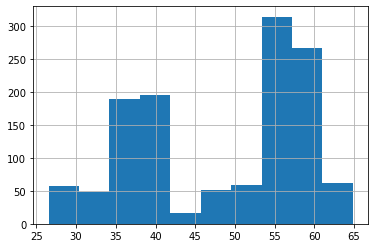

In [29]:
# histogram of column
df["open"].hist()

<AxesSubplot:>

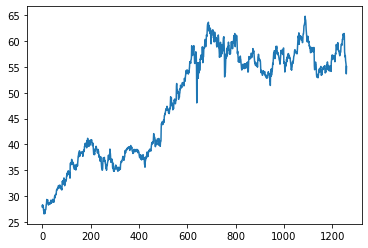

In [30]:
# line chart of column
df["open"].plot()

<AxesSubplot:>

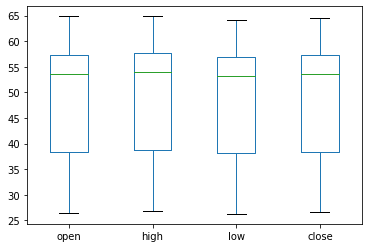

In [31]:
# box plot
df[["open", "high", "low", "close"]].plot.box()

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>]], dtype=object)

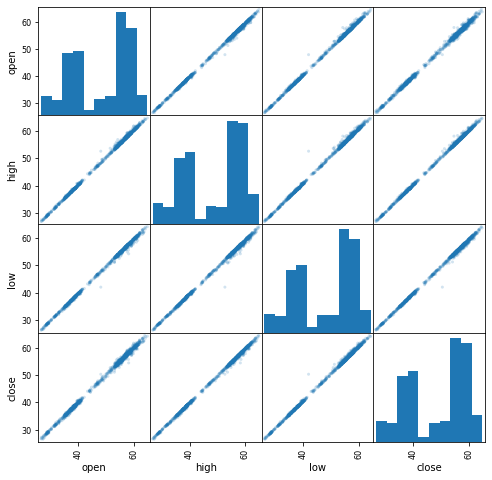

In [32]:
# scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df[["open", "high", "low", "close"]], alpha=0.2, figsize=(8,8))

## Exercise

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [53]:
DATA_COUNT = 1024

# make angle array
angles = np.random.rand(DATA_COUNT) * np.pi * 2.0

# make distance array
distances = np.random.rand(DATA_COUNT) * 2.0
distances[DATA_COUNT//2:] += np.random.rand(DATA_COUNT//2) + 2.0
distances += (np.random.rand(DATA_COUNT) + 1.0) / 2.0

# make marks array
y = np.zeros(DATA_COUNT)
y[DATA_COUNT//2:] = 1

# make coord arrays
x1 = np.sin(angles) * distances
x2 = np.cos(angles) * distances

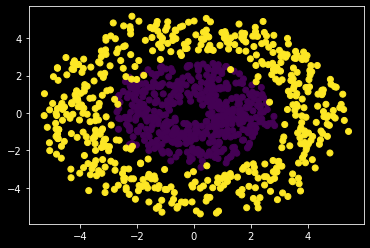

In [55]:
# show plot
plt.scatter(x1, x2, c=y)

In [65]:
# prepare data for frame
np_data = np.vstack([x1, x2, y])
np_data = np.swapaxes(np_data, 0, 1)

# make simple dataframe
data = pd.DataFrame(data=np_data, columns=["x1", "x2", "y"])
data

,x1,x2,y
0,-0.468687,-1.257243,0.0
1,-1.942913,-0.920862,0.0
2,1.424935,-1.830326,0.0
3,2.059014,-1.268141,0.0
4,1.435017,-1.211286,0.0
...,...,...,...
1019,3.286896,3.990973,1.0
1020,0.266823,3.967798,1.0
1021,-3.845745,1.170200,1.0
1022,3.675066,-2.670100,1.0


<AxesSubplot:xlabel='x1', ylabel='x2'>

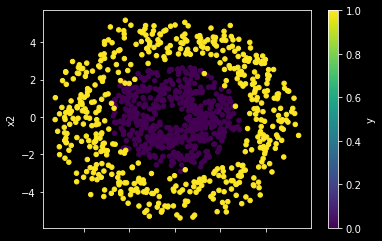

In [74]:
# plot from pandas
data.plot.scatter("x1", "x2",
                  c="y", colormap='viridis')

In [69]:
# add columns
data["x1^2"] = np.square(data["x1"].values)
data["x2^2"] = np.square(data["x2"].values)
data["x1*x2"] = data["x1"].values * data["x2"].values

# rearrange columns
data = data[["x1", "x2", "x1^2", "x2^2", "x1*x2", "y"]]

In [70]:
# save to file
data.to_csv("data/donut.csv", index=False, header=False)